In [1]:
import pandas as pd
import logging
import numpy as np
import sys
import math 
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline
import random 

In [2]:
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test  - test set, a 2D numpy array of size (num_instances, num_features)
    Returns:
        train_normalized - training set after normalization
        test_normalized  - test set after normalization

    """
    max_train = train.max(axis=0)
    min_train = train.min(axis=0)
    train_normalized = (train-min_train)/(max_train-min_train)
    test_normalized = (test-min_train)/(max_train-min_train)
    return train_normalized,test_normalized 

In [3]:
df = pd.read_csv('/Users/sunevan/Dropbox/Spring 2017/Machine Learning/1/Assignment/hw1-sgd/hw1-data.csv', delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)
print (X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # Add bias term

Split into Train and Test
(100, 48) (100, 48) (100,) (100,)
Scaling all to [0, 1]


### 2.2.1 ~ 2.2.4

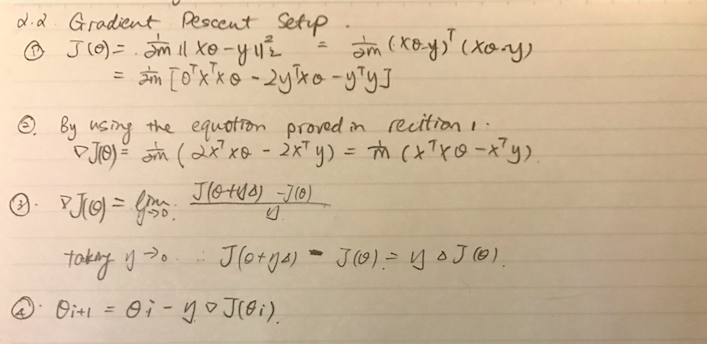

In [4]:
from IPython.display import Image
Image(filename='/Users/sunevan/Downloads/1.png')

### 2.2.5

In [5]:

########################################
#### The square loss function

def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the square loss for predicting y with X*theta
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)
    
    Returns:
        loss - the square loss, scalar
    """
    loss = 0 #initialize the square_loss
    norm_calc = np.dot(X,theta)-y
    loss = (1/(2*len(y)))* (np.linalg.norm(norm_calc))**2
    return loss

In [6]:
X = np.array([[1,2,3],[4,5,6],[7,8,9]])
theta = np.array([1,1,1])
y = np.array([1,4,9])
compute_square_loss(X, y, theta)

61.833333333333343

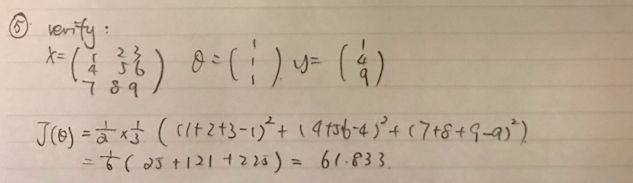

In [7]:
Image(filename='/Users/sunevan/Downloads/2.png')

### 2.2.6

In [8]:
########################################
### compute the gradient of square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute gradient of the square loss (as defined in compute_square_loss), at the point theta.
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
    
    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    gradient = 1/(len(y)) * (np.dot((np.dot(X.T,X)),theta)-np.dot(X.T,y))
    return gradient 
    

In [9]:
X_1 = np.array([[1,2],[3,4]])
theta = np.array([1,1])
y_1 = np.array([1,2])
compute_square_loss_gradient(X_1, y_1, theta)

array([  8.5,  12. ])

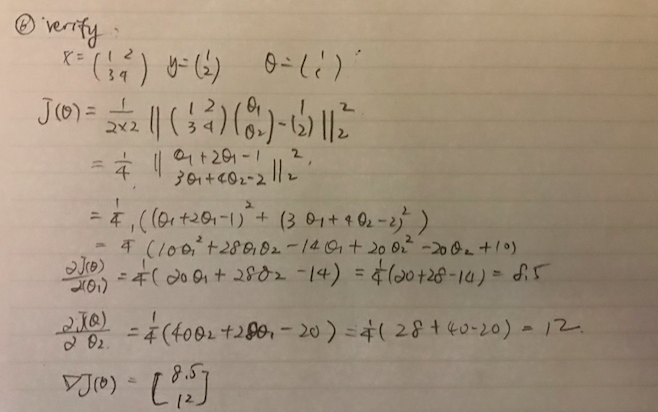

In [10]:
Image(filename='/Users/sunevan/Downloads/3.png')

### 2.3 Gradient Checker

In [12]:
###########################################
### Gradient Checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm.  Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4): 
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions: 
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1) 

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by: 
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error
    
    Return:
        A boolean value indicate whether the gradient is correct or not

    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #the true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    zero_vectors = np.zeros(num_features)
    
    for i in range(num_features):
        e = zero_vectors
        e[i]=1 
        approx_grad[i] = (compute_square_loss(X,y,theta+e*epsilon) - compute_square_loss(X,y,theta-e*epsilon)) / (2 * epsilon)
        e[i]=0
               
    distance = 0 
    for i in range(num_features):
        distance += (true_gradient[i]-approx_grad[i])**2
    
    distance = np.sqrt(distance)
    return distance<tolerance 
        

#################################################
### Generic Gradient Checker
#def generic_gradient_checker(X, y, theta, objective_func, gradient_func, epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. And check whether gradient_func(X, y, theta) returned
    the true gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    #TODO

In [13]:
grad_checker(X_1, y_1, theta, epsilon=0.01, tolerance=1e-4)

True

### 2.4 Batch Gradient Descent

In [14]:
####################################
#### Batch Gradient Descent

def batch_grad_descent(X, y, alpha=0.1, num_iter=1000, check_gradient=False):
    """
    In this question you will implement batch gradient descent to
    minimize the square loss objective
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_iter - number of iterations to run 
        check_gradient - a boolean value indicating whether checking the gradient when updating
        
    Returns:
        theta_hist - store the the history of parameter vector in iteration, 2D numpy array of size (num_iter+1, num_features) 
                    for instance, theta in iteration 0 should be theta_hist[0], theta in ieration (num_iter) is theta_hist[-1]
        loss_hist - the history of objective function vector, 1D numpy array of size (num_iter+1) 
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #initialize loss_hist
    theta = np.ones(num_features) #initialize theta
    theta_hist[0] = theta
    loss_hist[0] = compute_square_loss(X,y,theta)
    
    for i in range(num_iter):

        gradient = compute_square_loss_gradient(X,y,theta)
        if check_gradient is True:
            if grad_checker(X,y,theta) is not True:
                print ("Grad Checker Failed")
                pass 
        else:
            theta = theta - alpha*gradient 
            theta_hist[i+1] = theta
            loss_hist[i+1] = compute_square_loss(X,y,theta)
    return theta_hist,loss_hist 
    
    

### 2.4.2

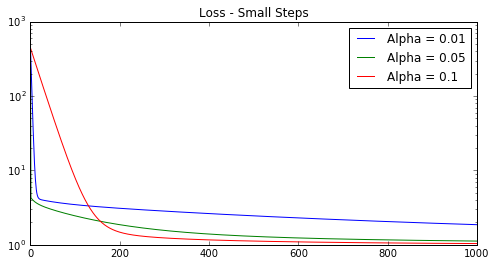

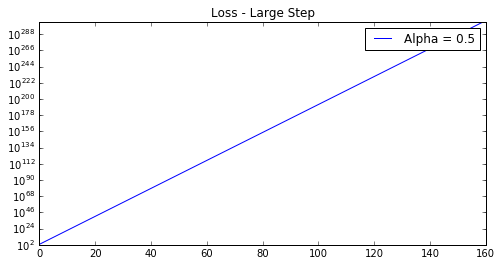

In [15]:
#############################################
## Visualization of Regularized Batch Gradient Descent
##X-axis: log(lambda_reg)
##Y-axis: square_loss

fig = plt.figure(figsize = (8,4))
for alpha in [0.01,0.05,0.1]:
    theta_hist,loss_hist = batch_grad_descent(X_train, y_train, alpha=alpha, num_iter = 1000, check_gradient=False)
    
    plt.plot(loss_hist,label = "Alpha = "+str(alpha))
    plt.legend(loc = "upper right")
    plt.yscale('log')

    
    
plt.title ("Loss - Small Steps")
plt.show()
fig = plt.figure(figsize = (8,4))
for alpha in [0.5]:
    theta_hist,loss_hist = batch_grad_descent(X_train, y_train, alpha=alpha, num_iter = 1000, check_gradient=False)
    
    plt.plot(loss_hist,label = "Alpha = "+str(alpha))
    plt.legend(loc = "upper right")
    plt.yscale('log')
    
    
plt.title ("Loss - Large Step")
plt.show()

#### Summary: when alpha becomes too large (like 0.5), the gradient descent doesn't converge. It looks like alpha = 0.01 or 0.05 converges quickly. 

In [237]:

####################################
###Q2.4b: Implement backtracking line search in batch_gradient_descent
###Check http://en.wikipedia.org/wiki/Backtracking_line_search for details

    
    



### 2.5.1

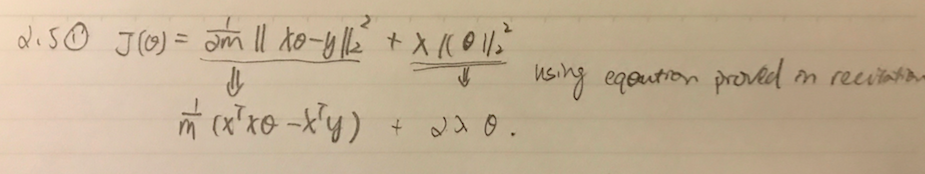

In [16]:
Image(filename='/Users/sunevan/Downloads/4.png')

### 2.5.2

In [17]:

###################################################
### Compute the gradient of Regularized Batch Gradient Descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg,B=1):
    """
    Compute the gradient of L2-regularized square loss function given X, y and theta
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient
    
    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    
    gradient = 1/(len(y)) * (np.dot((np.dot(X.T,X)),theta)-np.dot(X.T,y)) + (B*2*lambda_reg*theta)
    return gradient     



In [18]:
X_1 = np.array([[1,2],[3,4]])
theta = np.array([1,1])
y_1 = np.array([1,2])
compute_regularized_square_loss_gradient(X_1, y_1, theta,2)

array([ 12.5,  16. ])

### 2.5.3

In [19]:
def compute_regularized_square_loss(X, y, theta,lambda_reg=1,B=1):
    """
    Given a set of X, y, theta, compute the square loss for predicting y with X*theta
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)
    
    Returns:
        loss - the square loss, scalar
    """
    loss = 0 #initialize the square_loss
    norm_calc = np.dot(X,theta)-y
    loss = (1/(2*len(y)))* (np.linalg.norm(norm_calc))**2+B*lambda_reg*np.linalg.norm(theta)
    return loss

In [20]:
###################################################
### Batch Gradient Descent with regularization term
def regularized_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=1000,B=1):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        numIter - number of iterations to run 
        
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_iter+1, num_features) 
        loss_hist - the history of regularized loss value, 1D numpy array
    """
    (num_instances, num_features) = X.shape
    theta = np.ones(num_features) #Initialize theta
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #Initialize loss_hist
    
    theta_hist[0]=theta
    loss_hist[0]=compute_regularized_square_loss(X,y,theta,lambda_reg,B)
    
    for i in range(num_iter):
        gradient = compute_regularized_square_loss_gradient(X, y, theta, lambda_reg,B)
        theta = theta-alpha*gradient
        theta_hist[i+1] = theta
        loss_hist[i+1] = compute_square_loss(X,y,theta)
    return theta_hist,loss_hist 
    

### 2.5.4
#### When B is large enough, the bias term will be almost determined by the B itself. Especially in this case, all the features has been normalized.

### 2.5.7

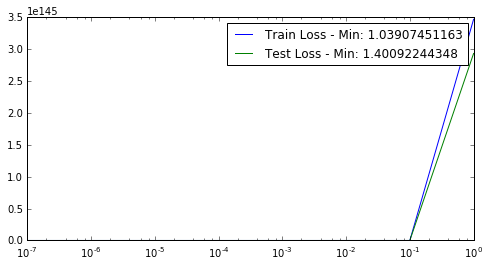

In [21]:
#############################################
## Visualization of Regularized Batch Gradient Descent
##X-axis: log(lambda_reg)
##Y-axis: square_loss
lambda_reg_list = [math.pow(10,-7),math.pow(10,-5),math.pow(10,-3),\
                   math.pow(10,-1),1,10,100]
theta_hist_converge = np.zeros((len(lambda_reg_list), X_train.shape[1])) 
train_loss = np.zeros((len(lambda_reg_list))) 
test_loss = np.zeros((len(lambda_reg_list))) 

for i in range(len(lambda_reg_list)):    
    lambda_in_use = lambda_reg_list[i]
    theta_in_use,loss_in_use = regularized_grad_descent(X_train, y_train, alpha=0.1,lambda_reg=lambda_in_use)
    theta_hist_converge[i] = theta_in_use[-1]
    train_loss[i] = compute_square_loss(X_train,y_train,theta_in_use[-1])
    test_loss[i]= compute_square_loss(X_test,y_test,theta_in_use[-1])


fig = plt.figure(figsize = (8,4))
plt.plot(lambda_reg_list,train_loss,label = "Train Loss - Min: "+str(min(train_loss)))
plt.plot(lambda_reg_list,test_loss,label = "Test Loss - Min: "+str(min(test_loss)))
plt.legend(loc = "upper right")
plt.xscale('log')
plt.show()   

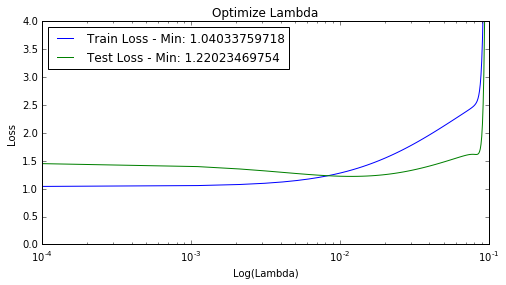

Best Lambda: 0.0122090909091
Best Theta: [-1.13470872  0.48025084  1.26637962  2.21255031 -1.67083278 -0.6648903
 -0.73560457 -0.73560457  0.7050549   1.26922368  2.27186868 -0.45279148
 -1.18570943 -3.58635172  1.37777377  2.23771064  1.19317102  0.36305405
 -0.06870017 -0.06870017 -0.06870017 -0.01957062 -0.01957062 -0.01957062
  0.00608936  0.00608936  0.00608936  0.01869709  0.01869709  0.01869709
  0.02592011  0.02592011  0.02592011 -0.05700721 -0.05700721 -0.05700721
  0.07326976  0.07326976  0.07326976  0.06084711  0.06084711  0.06084711
  0.05523282  0.05523282  0.05523282  0.05215703  0.05215703  0.05215703
 -1.15658722]


In [22]:
lambda_reg_list = np.linspace(math.pow(10,-4),math.pow(10,-1),num = 100)
theta_hist_converge = np.zeros((len(lambda_reg_list), X_train.shape[1])) 
train_loss = np.zeros((len(lambda_reg_list))) 
test_loss = np.zeros((len(lambda_reg_list))) 

for i in range(len(lambda_reg_list)):    
    lambda_in_use = lambda_reg_list[i]
    theta_in_use,loss_in_use = regularized_grad_descent(X_train, y_train, alpha=0.1,lambda_reg=lambda_in_use)
    theta_hist_converge[i] = theta_in_use[-1]
    train_loss[i] = compute_square_loss(X_train,y_train,theta_in_use[-1])
    test_loss[i]= compute_square_loss(X_test,y_test,theta_in_use[-1])



fig = plt.figure(figsize = (8,4))
plt.plot(lambda_reg_list,train_loss,label = "Train Loss - Min: "+str(min(train_loss)))
plt.plot(lambda_reg_list,test_loss,label = "Test Loss - Min: "+str(min(test_loss)))
plt.legend(loc = "upper left")
plt.xscale('log')
plt.ylim(ymax=4)
plt.title("Optimize Lambda")
plt.xlabel("Log(Lambda)")
plt.ylabel("Loss")
plt.show()

print ("Best Lambda: "+str(lambda_reg_list[np.argmin(test_loss)]))
print ("Best Theta: "+str(theta_hist_converge[np.argmin(test_loss)]))

### 2.5.6 & 2.5.8

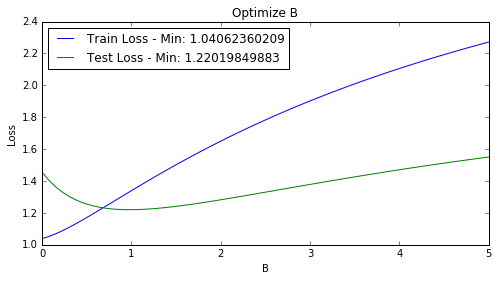

Best B: 0.967676767677
Best Theta to deploy: [-1.14404859  0.48429939  1.27351808  2.24250565 -1.69762677 -0.66539974
 -0.74200008 -0.74200008  0.71560856  1.27628984  2.30166029 -0.46511307
 -1.18258335 -3.62497892  1.38935964  2.26173014  1.19625682  0.36769078
 -0.06806211 -0.06806211 -0.06806211 -0.02013971 -0.02013971 -0.02013971
  0.00549434  0.00549434  0.00549434  0.01810238  0.01810238  0.01810238
  0.02532949  0.02532949  0.02532949 -0.05912366 -0.05912366 -0.05912366
  0.07208294  0.07208294  0.07208294  0.05991882  0.05991882  0.05991882
  0.05442635  0.05442635  0.05442635  0.05141878  0.05141878  0.05141878
 -1.15954976]


In [23]:
B_list = np.linspace(math.pow(10,-2),5,num = 100)
theta_hist_converge = np.zeros((len(B_list), X_train.shape[1])) 
train_loss = np.zeros((len(B_list))) 
test_loss = np.zeros((len(B_list))) 

for i in range(len(B_list)):    
    B_in_use = B_list[i]
    theta_in_use,loss_in_use = regularized_grad_descent(X_train, y_train, \
                                                        alpha=0.1,lambda_reg=0.0122090909091, B=B_in_use)
    theta_hist_converge[i] = theta_in_use[-1]
    train_loss[i] = compute_square_loss(X_train,y_train,theta_in_use[-1])
    test_loss[i]= compute_square_loss(X_test,y_test,theta_in_use[-1])



fig = plt.figure(figsize = (8,4))
plt.plot(B_list,train_loss,label = "Train Loss - Min: "+str(min(train_loss)))
plt.plot(B_list,test_loss,label = "Test Loss - Min: "+str(min(test_loss)))
plt.legend(loc = "upper left")
plt.title("Optimize B")
plt.xlabel("B")
plt.ylabel("Loss")
plt.show()

print ("Best B: "+str(B_list[np.argmin(test_loss)]))
print ("Best Theta to deploy: "+str(theta_hist_converge[np.argmin(test_loss)]))

### 2.6.1

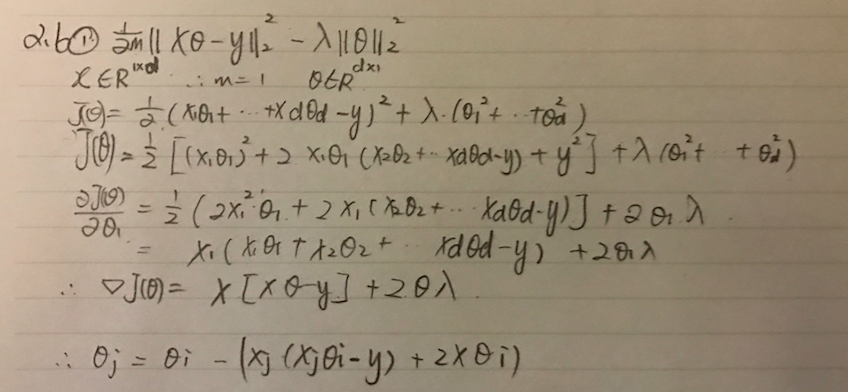

In [24]:
Image(filename='/Users/sunevan/Downloads/5.png')

### 2.6.2 Stochastic Gradient Descent

In [25]:
def shuffle_order(X,y):
 
    new_X = np.zeros((X.shape))
    new_y = np.zeros(y.shape)
    index_X = list(range(X.shape[0]))
    
    random_index = random.sample(index_X,len(index_X))
    for i in range(X.shape[0]):
        index_use = random_index[i]
        new_X[i] = X[index_use]
        new_y[i] = y[index_use]
    return new_X,new_y
        

In [26]:

#############################################
### Stochastic Gradient Descent

def stochastic_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=1000):
    """
    In this question you will implement stochastic gradient descent with a regularization term
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float. step size in gradient descent
                NOTE: In SGD, it's not always a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every iteration is alpha.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t)
                if alpha == "1/t", alpha = 1/t
        lambda_reg - the regularization coefficient
        num_iter - number of epochs (i.e number of times) to go through the whole training set
    
    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_iter, num_instances, num_features) 
        loss hist - the history of regularized loss function vector, 2D numpy array of size(num_iter, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
     
      
    theta_hist = np.zeros((num_iter, num_instances, num_features))  #Initialize theta_hist
    loss_hist = np.zeros((num_iter, num_instances))#Initialize loss_hist
    theta = np.ones(num_features) #Initialize theta
    t=1
    for i in range(num_iter):
        new_X,new_y = shuffle_order(X,y)
        for j in range(num_instances):
            
            if alpha  == "1/sqrt(t)":
                alpha_use = (1/(np.sqrt(t)))
            elif alpha == "1/t":
                alpha_use = (1/t)
            elif alpha  == "0.1/sqrt(t)":
                alpha_use = (0.1/(np.sqrt(t)))
            elif alpha == "0.1/t":
                alpha_use = (0.1/t)
            else:
                alpha_use = alpha 
            
            X_use = new_X[j,:]
            y_use = new_y[j]
            theta = theta - alpha_use * (X_use*(np.dot(X_use,theta)-y_use)+ 2* lambda_reg*theta)
            theta_hist[i,j,:]=theta 
            loss_hist[i,j] = compute_regularized_square_loss(new_X,new_y,theta=theta,lambda_reg = lambda_reg)
            t+=1
    
    return theta_hist,loss_hist 
    
    


### 2.6.3
#### Fixed step sizes: 

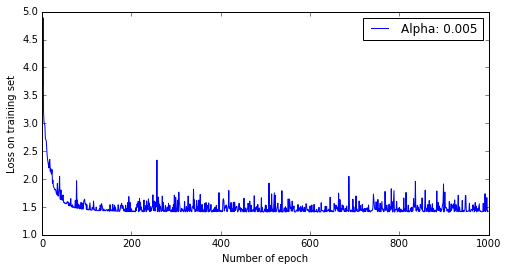

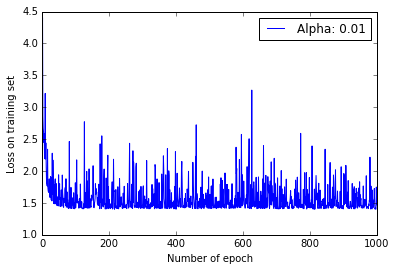

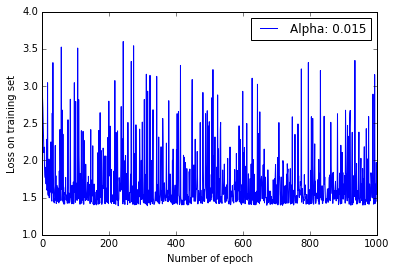

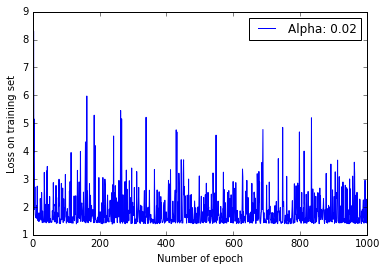

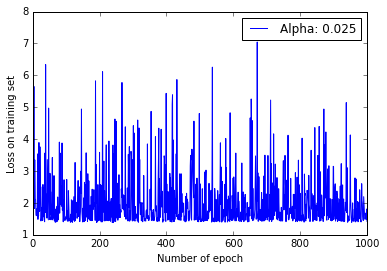

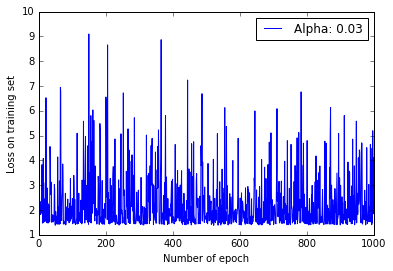

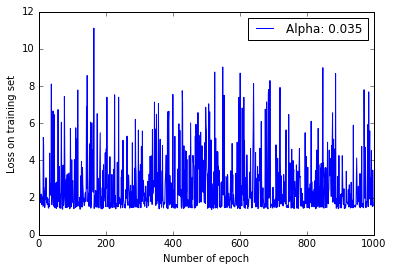

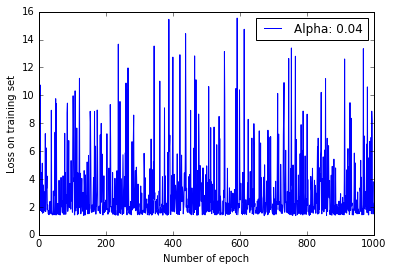

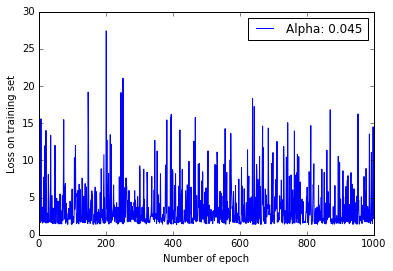

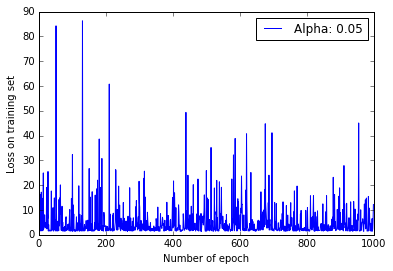

In [27]:
################################################
### Visualization that compares the convergence speed of batch
###and stochastic gradient descent for various approaches to step_size
##X-axis: Step number (for gradient descent) or Epoch (for SGD)
##Y-axis: log(objective_function_value) and/or objective_function_value

alpha_list =  np.linspace(0.005,0.05,num = 10)

reg_opt = 0.0122090909091
b_opt = 0.967676767677
fig = plt.figure(figsize = (8,4))
for i in range(len(alpha_list)):    
    alpha_in_use = alpha_list[i]
    theta_in_use,loss_in_use = stochastic_grad_descent(X_train, y_train, alpha=alpha_in_use, \
                                                       lambda_reg=reg_opt, num_iter=1000)
    theta_epoch = np.zeros((theta_in_use.shape[0],theta_in_use.shape[2]))
    loss_epoch = np.zeros(theta_in_use.shape[0])
    for i in range(theta_in_use.shape[0]):
        theta_epoch[i]=theta_in_use[i][-1]
        loss_epoch[i] = compute_regularized_square_loss(X_train,y_train,\
                                                       theta_in_use[i][-1],\
                                                       lambda_reg = reg_opt,\
                                                        B=b_opt)
                                                                              
    plt.plot(range(theta_in_use.shape[0]),loss_epoch,label = "Alpha: "+str(alpha_in_use))
    plt.legend(loc = "upper right")
    plt.ylabel('Loss on training set')
    plt.xlabel('Number of epoch')
    plt.show()     



# plt.plot(alpha_list,train_loss,label = "Train Loss - Min: "+str(min(train_loss)))
# plt.plot(alpha_list,test_loss,label = "Test Loss - Min: "+str(min(test_loss)))


# print ("Best Alpha: "+str(alpha_list[np.argmin(test_loss)]))
# print ("Best Theta: "+str(theta_hist_converge[np.argmin(test_loss)]))

#### It seems that the when the alpha is greater than 0.01, the loss function will diverge. 
#### Now, try 1/t and 1/sqrt (t)

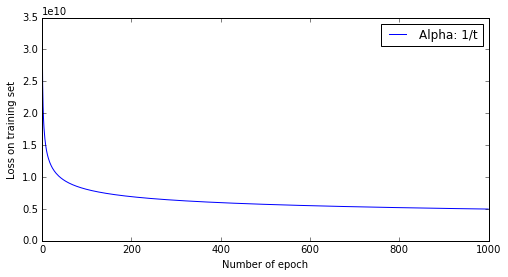

In [28]:
reg_opt = 0.0122090909091
b_opt = 0.967676767677
fig = plt.figure(figsize = (8,4))
      
theta_in_use,loss_in_use = stochastic_grad_descent(X_train, y_train, alpha="1/t", \
                                                   lambda_reg=reg_opt, num_iter=1000)
theta_epoch = np.zeros((theta_in_use.shape[0],theta_in_use.shape[2]))
loss_epoch = np.zeros(theta_in_use.shape[0])
for i in range(theta_in_use.shape[0]):
    theta_epoch[i]=theta_in_use[i][-1]
    loss_epoch[i] = compute_regularized_square_loss(X_train,y_train,\
                                                   theta_in_use[i][-1],\
                                                   lambda_reg = reg_opt,\
                                                    B=b_opt)

plt.plot(range(theta_in_use.shape[0]),loss_epoch,label = "Alpha: 1/t")
plt.legend(loc = "upper right")
plt.ylabel('Loss on training set')
plt.xlabel('Number of epoch')
plt.show()   

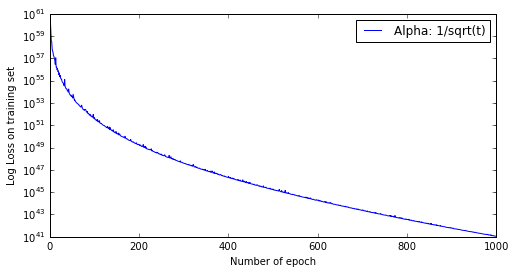

In [29]:
reg_opt = 0.0122090909091
b_opt = 0.967676767677
fig = plt.figure(figsize = (8,4))
      
theta_in_use,loss_in_use = stochastic_grad_descent(X_train, y_train, alpha="1/sqrt(t)", \
                                                   lambda_reg=reg_opt, num_iter=1000)
theta_epoch = np.zeros((theta_in_use.shape[0],theta_in_use.shape[2]))
loss_epoch = np.zeros(theta_in_use.shape[0])
for i in range(theta_in_use.shape[0]):
    theta_epoch[i]=theta_in_use[i][-1]
    loss_epoch[i] = compute_regularized_square_loss(X_train,y_train,\
                                                   theta_in_use[i][-1],\
                                                   lambda_reg = reg_opt,\
                                                    B=b_opt)

plt.plot(range(theta_in_use.shape[0]),loss_epoch,label = "Alpha: 1/sqrt(t)")
plt.legend(loc = "upper right")
plt.yscale('log')
plt.ylabel('Log Loss on training set')
plt.xlabel('Number of epoch')
plt.show()     



#### It seems that 1/t is too large to start. The step function is revised to 0.1/t and 0.1/sqrt(t)


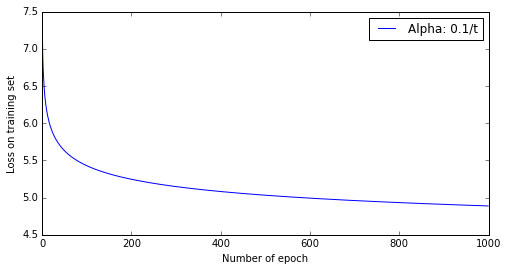

In [30]:
reg_opt = 0.0122090909091
b_opt = 0.967676767677
fig = plt.figure(figsize = (8,4))
      
theta_in_use,loss_in_use = stochastic_grad_descent(X_train, y_train, alpha="0.1/t", \
                                                   lambda_reg=reg_opt, num_iter=1000)
theta_epoch = np.zeros((theta_in_use.shape[0],theta_in_use.shape[2]))
loss_epoch = np.zeros(theta_in_use.shape[0])
for i in range(theta_in_use.shape[0]):
    theta_epoch[i]=theta_in_use[i][-1]
    loss_epoch[i] = compute_regularized_square_loss(X_train,y_train,\
                                                   theta_in_use[i][-1],\
                                                   lambda_reg = reg_opt,\
                                                    B=b_opt)

plt.plot(range(theta_in_use.shape[0]),loss_epoch,label = "Alpha: 0.1/t")
plt.legend(loc = "upper right")
plt.ylabel('Loss on training set')
plt.xlabel('Number of epoch')
plt.show() 

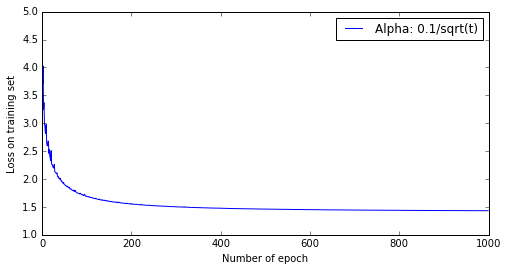

In [31]:
reg_opt = 0.0122090909091
b_opt = 0.967676767677
fig = plt.figure(figsize = (8,4))
      
theta_in_use,loss_in_use = stochastic_grad_descent(X_train, y_train, alpha="0.1/sqrt(t)", \
                                                   lambda_reg=reg_opt, num_iter=1000)
theta_epoch = np.zeros((theta_in_use.shape[0],theta_in_use.shape[2]))
loss_epoch = np.zeros(theta_in_use.shape[0])
for i in range(theta_in_use.shape[0]):
    theta_epoch[i]=theta_in_use[i][-1]
    loss_epoch[i] = compute_regularized_square_loss(X_train,y_train,\
                                                   theta_in_use[i][-1],\
                                                   lambda_reg = reg_opt,\
                                                    B=b_opt)

plt.plot(range(theta_in_use.shape[0]),loss_epoch,label = "Alpha: 0.1/sqrt(t)")
plt.legend(loc = "upper right")
plt.ylabel('Loss on training set')
plt.xlabel('Number of epoch')
plt.show()     




### 2.6.4

In [32]:
%timeit stochastic_grad_descent(X_train, y_train,alpha=0.005, lambda_reg=reg_opt, num_iter=1)

100 loops, best of 3: 3.19 ms per loop


In [33]:
%timeit regularized_grad_descent(X_train,y_train,alpha=0.005, lambda_reg=reg_opt,num_iter=1)

The slowest run took 11.41 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 81.3 µs per loop


### 2.6.5
#### I will choose batch gradient descent to minimize the total number steps since it converges quicker. It also makes sense that stochastic gradient descent brings more noise. If goal is to optimizie total time, I will take SGD since the performance looks very stable. Even though batch gradient descent looks faster in some run, the performance can be longer on larger dataset. 

### 3.1.1 ~ 3.1.2

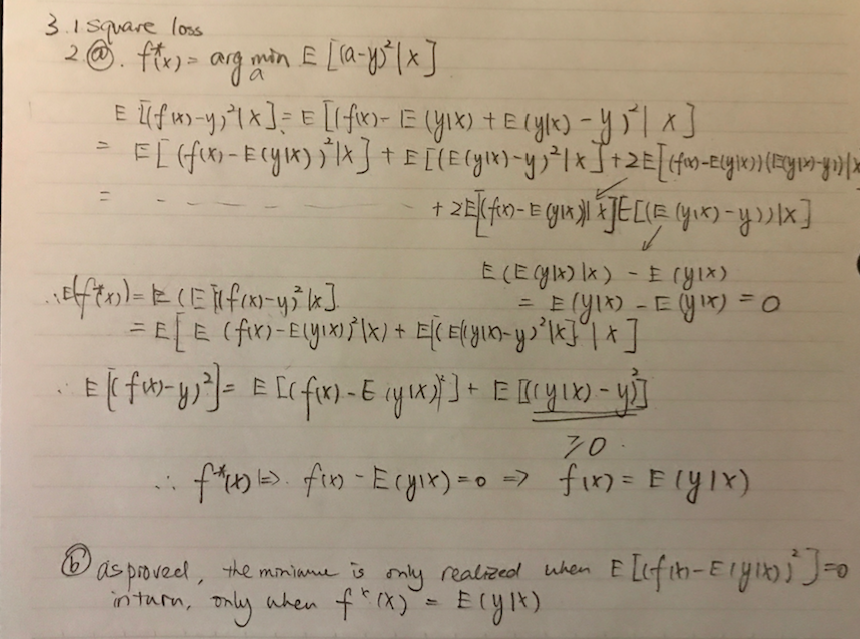

In [34]:
Image(filename='/Users/sunevan/Downloads/6.png')

In [ ]:



def main():
    #Loading the dataset
    print('loading the dataset')
    
    df = pd.read_csv('hw1-data.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # Add bias term

    # TODO

if __name__ == "__main__":
    main()
